In [91]:
#importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import joblib, scipy
from sklearn.metrics import get_scorer_names

## Studying Dataset

In [2]:
#Loading the dataset
df=pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
# Dropping ID as it is not used
df.drop(['ID'],axis=1,inplace=True)


In [4]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
df.shape

(418, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [7]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
# Checking for percentage of null data in each column

df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [9]:
# checking for duplicates
df[df.duplicated()]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


## Feature Engineering

In [10]:
df.Age = (df.Age.values/365.0).round()
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [11]:
# Imputatuion of missing values
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [12]:
# Treatment of Outliers 
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [13]:
# Encoding of categorical values

df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

## Separating the independent predictor features and the target label

### We will not be using 'Status' and 'N_days' as our features since they will cause data leakage.

In [14]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage


In [15]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

<Axes: xlabel='Stage', ylabel='count'>

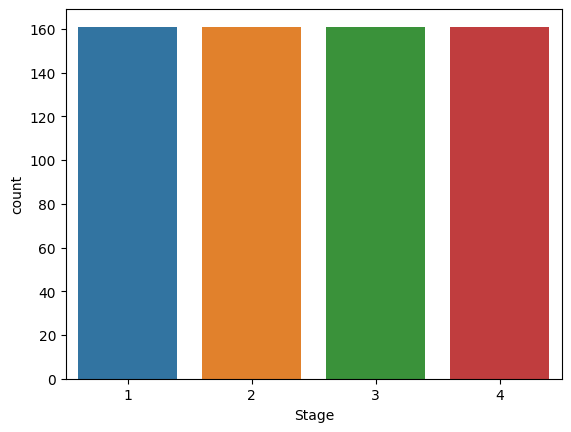

In [16]:
sns.countplot(x=y)

## Feature Scaling

In [17]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-0.761738,0.948364,-0.372682,4.762612,0.954600,2.275993,3.131310,2.397493,-0.693153,-2.440952,1.927976,0.613887,0.690009,2.063972,-0.850961,1.949626
1,-0.761738,0.636910,-0.372682,-0.217830,0.954600,2.275993,0.179793,-0.524185,-0.118311,1.531251,-0.511298,2.256582,0.052969,-0.676083,-0.504724,-0.035322
2,-0.761738,2.090359,3.149079,-0.217830,-1.120287,-0.463254,-2.771723,-0.382813,-1.884897,-0.171122,2.382351,-1.308721,-0.401278,-1.752533,-1.286550,1.701508
3,-0.761738,0.533092,-0.372682,-0.217830,0.954600,2.275993,-2.771723,-0.194318,-0.931502,-2.595713,-0.272154,2.256582,-1.326198,-0.545604,-0.929144,-0.407499
4,1.477672,-1.231810,-0.372682,-0.217830,0.954600,2.275993,0.179793,0.559663,-0.440783,-0.042154,1.617088,-1.060797,0.043320,-1.197998,-1.454084,0.336856


## Model Training & Evaluation

## Dividing the dataset into training and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.44      0.52      0.48        50
           2       0.34      0.25      0.29        52
           3       0.33      0.38      0.35        39
           4       0.69      0.66      0.67        53

    accuracy                           0.46       194
   macro avg       0.45      0.45      0.45       194
weighted avg       0.46      0.46      0.46       194



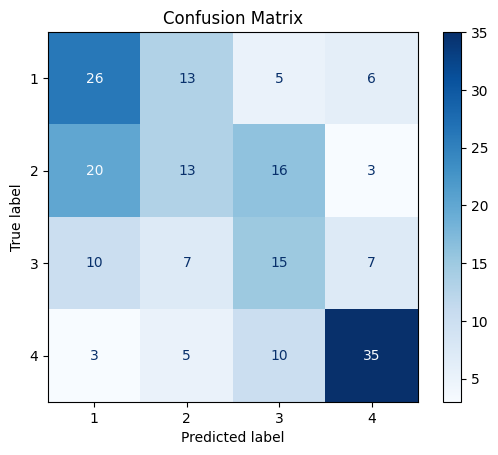

In [21]:
ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [23]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.63      0.90      0.74        50
           2       0.66      0.37      0.47        52
           3       0.35      0.44      0.39        39
           4       0.65      0.57      0.61        53

    accuracy                           0.57       194
   macro avg       0.57      0.57      0.55       194
weighted avg       0.59      0.57      0.56       194



In [24]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

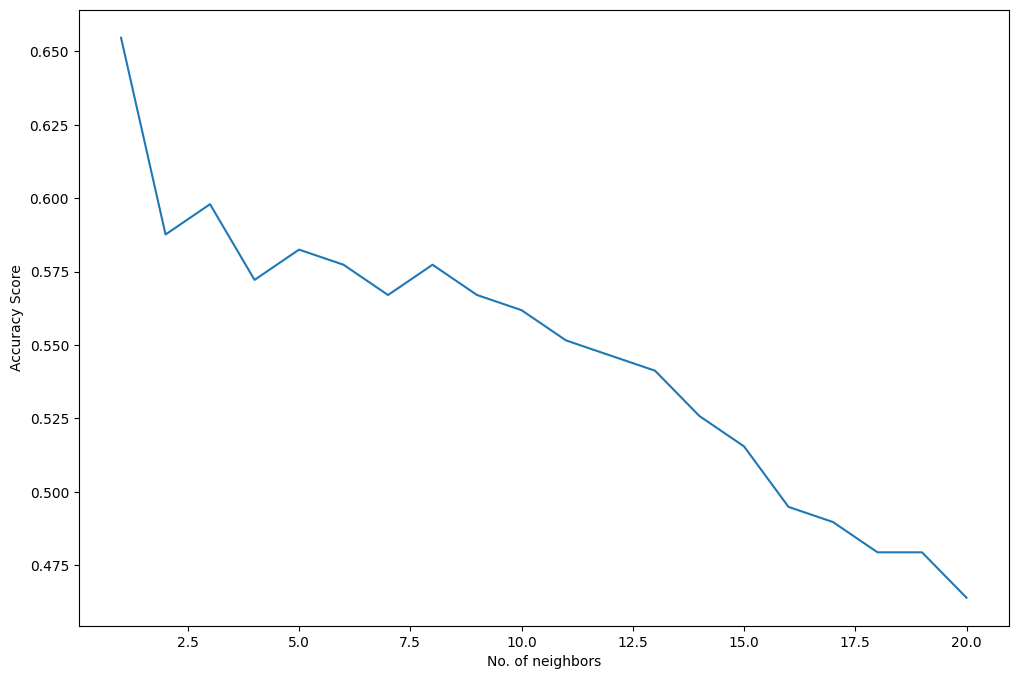

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(x=np.arange(1,21), y=scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')
plt.show()


In [26]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [27]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[43  4  3  0]
 [21 15 11  5]
 [13  7 14  5]
 [ 9  5 16 23]]
              precision    recall  f1-score   support

           1       0.50      0.86      0.63        50
           2       0.48      0.29      0.36        52
           3       0.32      0.36      0.34        39
           4       0.70      0.43      0.53        53

    accuracy                           0.49       194
   macro avg       0.50      0.49      0.47       194
weighted avg       0.51      0.49      0.47       194



In [28]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [29]:
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))

[[16 18  8  8]
 [11 22 11  8]
 [ 4 14 15  6]
 [ 4 16 15 18]]
              precision    recall  f1-score   support

           1       0.46      0.32      0.38        50
           2       0.31      0.42      0.36        52
           3       0.31      0.38      0.34        39
           4       0.45      0.34      0.39        53

    accuracy                           0.37       194
   macro avg       0.38      0.37      0.37       194
weighted avg       0.39      0.37      0.37       194



In [30]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [31]:
pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))

[[36  4  1  9]
 [23 11  8 10]
 [11 11  4 13]
 [ 6  7  6 34]]
              precision    recall  f1-score   support

           1       0.47      0.72      0.57        50
           2       0.33      0.21      0.26        52
           3       0.21      0.10      0.14        39
           4       0.52      0.64      0.57        53

    accuracy                           0.44       194
   macro avg       0.38      0.42      0.38       194
weighted avg       0.39      0.44      0.40       194



In [32]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [33]:
ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))

[[30  7  6  7]
 [23  8 14  7]
 [ 8  7 14 10]
 [ 3  4 11 35]]
              precision    recall  f1-score   support

           1       0.47      0.60      0.53        50
           2       0.31      0.15      0.21        52
           3       0.31      0.36      0.33        39
           4       0.59      0.66      0.62        53

    accuracy                           0.45       194
   macro avg       0.42      0.44      0.42       194
weighted avg       0.43      0.45      0.43       194



In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[35  4  7  4]
 [ 6 20 15 11]
 [ 6  8 15 10]
 [ 5  8 17 23]]
              precision    recall  f1-score   support

           1       0.67      0.70      0.69        50
           2       0.50      0.38      0.43        52
           3       0.28      0.38      0.32        39
           4       0.48      0.43      0.46        53

    accuracy                           0.48       194
   macro avg       0.48      0.48      0.47       194
weighted avg       0.49      0.48      0.48       194



In [36]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

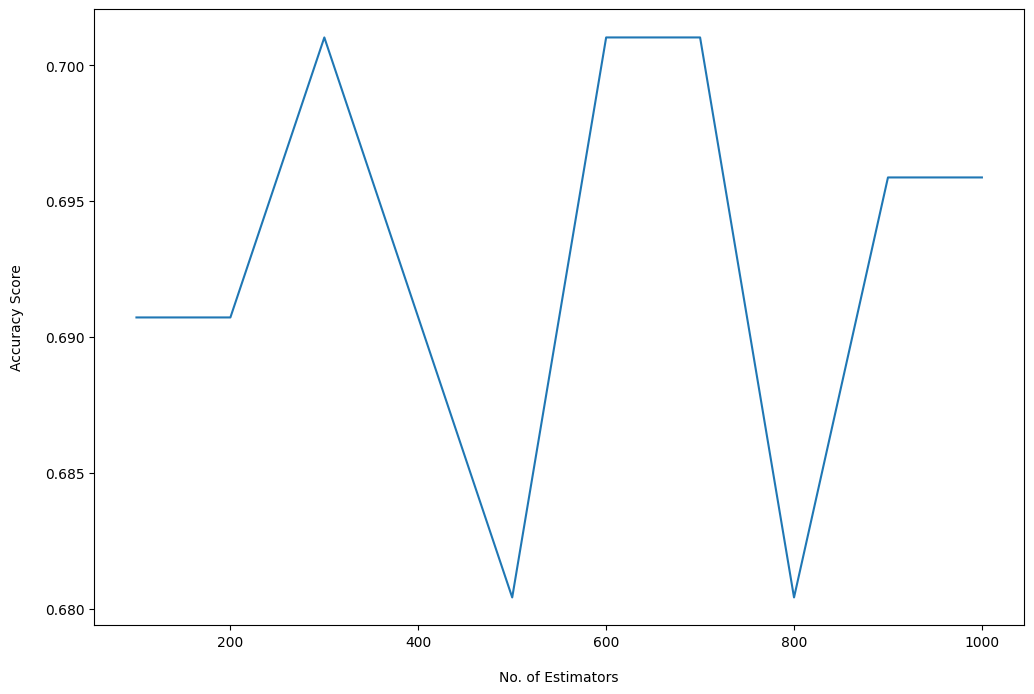

In [37]:
plt.figure(figsize=(12,8))
sns.lineplot(x=np.arange(100,1001,100),y=scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)

In [38]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [39]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[49  1  0  0]
 [ 3 33 11  5]
 [ 7  4 21  7]
 [ 0  5 14 34]]
              precision    recall  f1-score   support

           1       0.83      0.98      0.90        50
           2       0.77      0.63      0.69        52
           3       0.46      0.54      0.49        39
           4       0.74      0.64      0.69        53

    accuracy                           0.71       194
   macro avg       0.70      0.70      0.69       194
weighted avg       0.71      0.71      0.70       194



<Axes: xlabel='Importance', ylabel='Feature'>

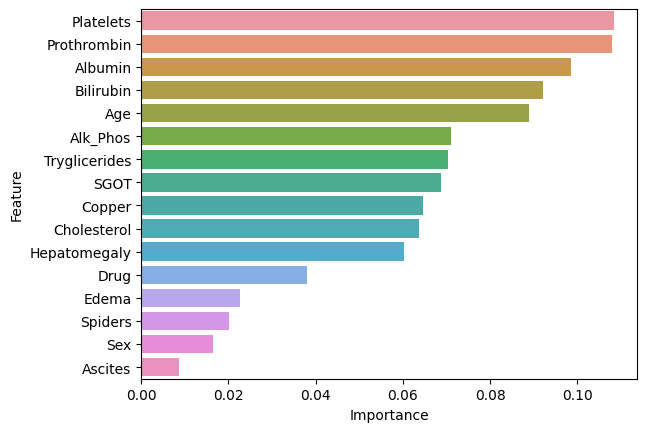

In [40]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')

In [41]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [42]:
et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))

[[48  2  0  0]
 [ 5 30 11  6]
 [ 7  4 20  8]
 [ 0  7 16 30]]
              precision    recall  f1-score   support

           1       0.80      0.96      0.87        50
           2       0.70      0.58      0.63        52
           3       0.43      0.51      0.47        39
           4       0.68      0.57      0.62        53

    accuracy                           0.66       194
   macro avg       0.65      0.65      0.65       194
weighted avg       0.67      0.66      0.66       194



In [43]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [44]:
abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

[[27 20  2  1]
 [16 23  6  7]
 [ 8 12  7 12]
 [ 1 10 11 31]]
              precision    recall  f1-score   support

           1       0.52      0.54      0.53        50
           2       0.35      0.44      0.39        52
           3       0.27      0.18      0.22        39
           4       0.61      0.58      0.60        53

    accuracy                           0.45       194
   macro avg       0.44      0.44      0.43       194
weighted avg       0.45      0.45      0.45       194



In [45]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.075969
0:	learn: 1.3580804	total: 144ms	remaining: 2m 24s
1:	learn: 1.3367968	total: 151ms	remaining: 1m 15s
2:	learn: 1.3142087	total: 157ms	remaining: 52.2s
3:	learn: 1.2927537	total: 164ms	remaining: 40.8s
4:	learn: 1.2773431	total: 171ms	remaining: 33.9s
5:	learn: 1.2614852	total: 178ms	remaining: 29.4s
6:	learn: 1.2422414	total: 184ms	remaining: 26.1s
7:	learn: 1.2252722	total: 189ms	remaining: 23.5s
8:	learn: 1.2065853	total: 196ms	remaining: 21.5s
9:	learn: 1.1918572	total: 201ms	remaining: 19.9s
10:	learn: 1.1762413	total: 207ms	remaining: 18.6s
11:	learn: 1.1578031	total: 213ms	remaining: 17.5s
12:	learn: 1.1457645	total: 218ms	remaining: 16.6s
13:	learn: 1.1361322	total: 224ms	remaining: 15.7s
14:	learn: 1.1210049	total: 230ms	remaining: 15.1s
15:	learn: 1.1107489	total: 236ms	remaining: 14.5s
16:	learn: 1.0947243	total: 242ms	remaining: 14s
17:	learn: 1.0821217	total: 247ms	remaining: 13.5s
18:	learn: 1.0708827	total: 252ms	remaining: 13s
19:	learn: 1.

In [46]:
cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))

[[48  2  0  0]
 [ 3 33 11  5]
 [ 6  3 22  8]
 [ 1  2 14 36]]
              precision    recall  f1-score   support

           1       0.83      0.96      0.89        50
           2       0.82      0.63      0.72        52
           3       0.47      0.56      0.51        39
           4       0.73      0.68      0.71        53

    accuracy                           0.72       194
   macro avg       0.71      0.71      0.71       194
weighted avg       0.73      0.72      0.72       194



In [47]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [48]:
hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))

[[45  4  0  1]
 [ 4 27 16  5]
 [ 5  6 20  8]
 [ 1  7 14 31]]
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        50
           2       0.61      0.52      0.56        52
           3       0.40      0.51      0.45        39
           4       0.69      0.58      0.63        53

    accuracy                           0.63       194
   macro avg       0.63      0.63      0.63       194
weighted avg       0.64      0.63      0.63       194



In [49]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [50]:
bag_pred = bag.predict(X_test)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))

[[45  2  2  1]
 [ 8 24 13  7]
 [ 8  8 14  9]
 [ 5  4 15 29]]
              precision    recall  f1-score   support

           1       0.68      0.90      0.78        50
           2       0.63      0.46      0.53        52
           3       0.32      0.36      0.34        39
           4       0.63      0.55      0.59        53

    accuracy                           0.58       194
   macro avg       0.57      0.57      0.56       194
weighted avg       0.58      0.58      0.57       194



In [51]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [52]:
gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[49  0  0  1]
 [48  0  3  1]
 [29  0  7  3]
 [32  0  3 18]]
              precision    recall  f1-score   support

           1       0.31      0.98      0.47        50
           2       0.00      0.00      0.00        52
           3       0.54      0.18      0.27        39
           4       0.78      0.34      0.47        53

    accuracy                           0.38       194
   macro avg       0.41      0.37      0.30       194
weighted avg       0.40      0.38      0.30       194



In [53]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [54]:
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

[[44  2  4  0]
 [ 5 25 13  9]
 [ 5  7 17 10]
 [ 3  4 14 32]]
              precision    recall  f1-score   support

           1       0.77      0.88      0.82        50
           2       0.66      0.48      0.56        52
           3       0.35      0.44      0.39        39
           4       0.63      0.60      0.62        53

    accuracy                           0.61       194
   macro avg       0.60      0.60      0.60       194
weighted avg       0.62      0.61      0.61       194



In [55]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 16
[LightGBM] [Info] Start training from score -1.399717
[LightGBM] [Info] Start training from score -1.417900
[LightGBM] [Info] Start training from score -1.305227
[LightGBM] [Info] Start training from score -1.427116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMClassifier()

In [56]:
lgbm_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))

[[46  3  1  0]
 [ 5 26 14  7]
 [ 3  7 18 11]
 [ 1  5 11 36]]
              precision    recall  f1-score   support

           1       0.84      0.92      0.88        50
           2       0.63      0.50      0.56        52
           3       0.41      0.46      0.43        39
           4       0.67      0.68      0.67        53

    accuracy                           0.65       194
   macro avg       0.64      0.64      0.64       194
weighted avg       0.65      0.65      0.65       194



In [57]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [58]:
bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))

[[27  9  7  7]
 [16 10 15 11]
 [14  4 14  7]
 [ 4  5 11 33]]
              precision    recall  f1-score   support

           1       0.44      0.54      0.49        50
           2       0.36      0.19      0.25        52
           3       0.30      0.36      0.33        39
           4       0.57      0.62      0.59        53

    accuracy                           0.43       194
   macro avg       0.42      0.43      0.41       194
weighted avg       0.43      0.43      0.42       194



In [59]:
y_train_forxgb = y_train - 1
y_test_forxgb = y_test - 1 

In [60]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train_forxgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[ 0  0  0  0  0]
 [49  1  0  0  0]
 [ 5 28 12  7  0]
 [ 5  4 21  9  0]
 [ 0  4 12 37  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.02      0.02        50
           2       0.27      0.23      0.25        52
           3       0.17      0.23      0.20        39
           4       0.00      0.00      0.00        53

    accuracy                           0.11       194
   macro avg       0.09      0.10      0.09       194
weighted avg       0.11      0.11      0.11       194



## Model Performance Analysis

In [62]:
print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Logistic Regression: 45.88%
Accuracy Score of Passive Aggressive Classifier: 43.81%
Accuracy Score of SGD Classifer: 36.6%
Accuracy Score of Ridge Classifier: 44.85%
Accuracy Score of Gaussian Naive Bayes: 38.14%
Accuracy Score of Bernoulli Naive Bayes: 43.3%
Accuracy Score of K Neighbors Classifier: 48.97%
Accuracy Score of Support Vector Classifier: 57.22%
Accuracy Score of Decision Tree Classifier: 47.94%
Accuracy Score of Random Forest Classifier: 70.62%
Accuracy Score of XG Boost Classifier: 11.34%
Accuracy Score of Cat Boost Classifier: 71.65%
Accuracy Score of Gradient Boosting Classifier: 60.82%
Accuracy Score of Histogram Gradient Boosting Classifier: 63.4%
Accuracy Score of Bagging Classifier: 57.73%
Accuracy Score of Ada Boost Classifier: 45.36%
Accuracy Score of Extra Trees Classifier: 65.98%
Accuracy Score of Light GBM Classifier: 64.95%


Cat Boost Classifier is the best performing model that boasts a superb prediction accuracy of more than 70%.

## Hyperparameter Tuning using GridSearchCV and other cross validation techniques

In [63]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'class_weight': ['balanced','balanced_subsample']}
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,verbose=2,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2))
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             verbose=2)

In [64]:
grid_rf.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 200}

In [65]:
grid_rf_pred = grid_rf.predict(X_test)
print(classification_report(y_test,grid_rf_pred))

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        50
           2       0.78      0.60      0.67        52
           3       0.42      0.56      0.48        39
           4       0.77      0.62      0.69        53

    accuracy                           0.69       194
   macro avg       0.69      0.68      0.68       194
weighted avg       0.71      0.69      0.69       194



In [66]:
cb_cv = cross_validate(cb,X_test,y_test,cv=8,verbose=2)
cb_cv = pd.DataFrame(cb_cv)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cb_cv.test_score.mean()*100,2)) + '%')

Learning rate set to 0.072268
0:	learn: 1.3652399	total: 4.75ms	remaining: 4.75s
1:	learn: 1.3451934	total: 7.75ms	remaining: 3.87s
2:	learn: 1.3328578	total: 10.6ms	remaining: 3.52s
3:	learn: 1.3180843	total: 13.8ms	remaining: 3.43s
4:	learn: 1.3006085	total: 17ms	remaining: 3.39s
5:	learn: 1.2841261	total: 19.2ms	remaining: 3.18s
6:	learn: 1.2708421	total: 22.1ms	remaining: 3.13s
7:	learn: 1.2578264	total: 24.8ms	remaining: 3.07s
8:	learn: 1.2407070	total: 27.9ms	remaining: 3.07s
9:	learn: 1.2217178	total: 30.8ms	remaining: 3.05s
10:	learn: 1.2071288	total: 33.2ms	remaining: 2.98s
11:	learn: 1.1923049	total: 35.4ms	remaining: 2.92s
12:	learn: 1.1797360	total: 37.7ms	remaining: 2.86s
13:	learn: 1.1705683	total: 40.4ms	remaining: 2.85s
14:	learn: 1.1591893	total: 42.9ms	remaining: 2.82s
15:	learn: 1.1476418	total: 45.6ms	remaining: 2.8s
16:	learn: 1.1344927	total: 47.7ms	remaining: 2.76s
17:	learn: 1.1234689	total: 49.7ms	remaining: 2.71s
18:	learn: 1.1130790	total: 52ms	remaining: 2.6

In [67]:
cv_cb = cross_validate(cb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_cb = pd.DataFrame(cv_cb)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cv_cb.test_accuracy.mean()*100,2)) + '%')

Learning rate set to 0.07195
0:	learn: 1.3606476	total: 3.18ms	remaining: 3.17s
1:	learn: 1.3441373	total: 5.65ms	remaining: 2.82s
2:	learn: 1.3264855	total: 7.92ms	remaining: 2.63s
3:	learn: 1.3104653	total: 9.9ms	remaining: 2.46s
4:	learn: 1.2948050	total: 12.5ms	remaining: 2.48s
5:	learn: 1.2848360	total: 14.7ms	remaining: 2.44s
6:	learn: 1.2679224	total: 17.2ms	remaining: 2.44s
7:	learn: 1.2527289	total: 20.4ms	remaining: 2.52s
8:	learn: 1.2372237	total: 23.1ms	remaining: 2.54s
9:	learn: 1.2156593	total: 25.7ms	remaining: 2.55s
10:	learn: 1.1978151	total: 29ms	remaining: 2.6s
11:	learn: 1.1811824	total: 33.1ms	remaining: 2.73s
12:	learn: 1.1694763	total: 35.2ms	remaining: 2.67s
13:	learn: 1.1593780	total: 37.9ms	remaining: 2.67s
14:	learn: 1.1462037	total: 41.1ms	remaining: 2.7s
15:	learn: 1.1351683	total: 43.6ms	remaining: 2.68s
16:	learn: 1.1196119	total: 46.1ms	remaining: 2.66s
17:	learn: 1.1059862	total: 48.3ms	remaining: 2.63s
18:	learn: 1.0934971	total: 50.5ms	remaining: 2.61

In [68]:
cb_cv = cross_val_score(cb,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(np.mean(cb_cv)*100,2)) + '%')

Learning rate set to 0.072375
0:	learn: 1.3653821	total: 3.47ms	remaining: 3.47s
1:	learn: 1.3538536	total: 6.44ms	remaining: 3.21s
2:	learn: 1.3396978	total: 8.84ms	remaining: 2.94s
3:	learn: 1.3212454	total: 11.9ms	remaining: 2.97s
4:	learn: 1.3079356	total: 15.4ms	remaining: 3.06s
5:	learn: 1.2930649	total: 18.2ms	remaining: 3.01s
6:	learn: 1.2766813	total: 20.3ms	remaining: 2.88s
7:	learn: 1.2654284	total: 22.7ms	remaining: 2.82s
8:	learn: 1.2509143	total: 25.3ms	remaining: 2.78s
9:	learn: 1.2322903	total: 28.2ms	remaining: 2.79s
10:	learn: 1.2192278	total: 30.7ms	remaining: 2.76s
11:	learn: 1.2028751	total: 33.7ms	remaining: 2.77s
12:	learn: 1.1880962	total: 36.3ms	remaining: 2.75s
13:	learn: 1.1785907	total: 39ms	remaining: 2.74s
14:	learn: 1.1639785	total: 41.7ms	remaining: 2.74s
15:	learn: 1.1514930	total: 43.8ms	remaining: 2.69s
16:	learn: 1.1346572	total: 46ms	remaining: 2.66s
17:	learn: 1.1225855	total: 48.1ms	remaining: 2.62s
18:	learn: 1.1119374	total: 50.5ms	remaining: 2.

In [69]:
rf_cv = cross_val_score(rf,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(np.mean(rf_cv)*100,2)) + '%')

Mean Accuracy Score of Random Forest Classifier: 54.71%


In [70]:
cv_rf = cross_validate(rf,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_rf = pd.DataFrame(cv_rf)
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(cv_rf.test_accuracy.mean()*100,2)) + '%')

[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
Mean Accuracy Score of Random Forest Classifier: 56.19%


In [71]:
et_cv = cross_validate(et,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=10),verbose=1,scoring=['accuracy','roc_auc_ovr_weighted','roc_auc_ovo_weighted','f1_weighted'])
et_cv = pd.DataFrame(et_cv)
et_cv.head()

,fit_time,score_time,test_accuracy,test_roc_auc_ovr_weighted,test_roc_auc_ovo_weighted,test_f1_weighted
0,0.061921,0.013999,0.476923,0.798389,0.788466,0.453541
1,0.058001,0.014000,0.507692,0.746566,0.729199,0.514209
2,0.056001,0.015024,0.500000,0.764426,0.753417,0.465904
3,0.061069,0.012970,0.569231,0.779474,0.766857,0.538269
4,0.058008,0.012986,0.461538,0.758119,0.747111,0.443742


In [72]:
print("Mean Accuracy Score of Extra Trees Classifier:",str(np.round(et_cv.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Extra Trees Classifier: 52.16%


In [73]:
param_grid = {'n_neighbors': np.arange(1,51), 
              'weights': ['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn,param_grid,cv=RepeatedStratifiedKFold(n_splits=2,n_repeats=6),verbose=2)
grid_knn.fit(X_train,y_train)

Fitting 12 folds for each of 400 candidates, totalling 4800 fits
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1,

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=6, n_splits=2, random_state=None),
             estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [74]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [75]:
grid_knn_pred = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_pred))

              precision    recall  f1-score   support

           1       0.79      0.96      0.86        50
           2       0.64      0.62      0.63        52
           3       0.44      0.44      0.44        39
           4       0.68      0.57      0.62        53

    accuracy                           0.65       194
   macro avg       0.64      0.64      0.64       194
weighted avg       0.65      0.65      0.65       194



In [78]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['log_loss'] }

In [79]:
grid_hgb = GridSearchCV(HistGradientBoostingClassifier(),param_grid,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=3),verbose=2)
grid_hgb.fit(X_train,y_train)

Fitting 12 folds for each of 5 candidates, totalling 60 fits
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.1s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.2s
[CV] END ...................learning_rate=0.2, l

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=4, random_state=None),
             estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.4, 0.5, 0.8, 1.0],
                         'loss': ['log_loss']},
             verbose=2)

In [80]:
grid_hgb.best_params_

{'learning_rate': 0.5, 'loss': 'log_loss'}

In [81]:
grid_hgb_pred = grid_hgb.predict(X_test)
print(classification_report(y_test,grid_hgb_pred))

              precision    recall  f1-score   support

           1       0.81      0.92      0.86        50
           2       0.60      0.50      0.55        52
           3       0.42      0.49      0.45        39
           4       0.67      0.62      0.65        53

    accuracy                           0.64       194
   macro avg       0.63      0.63      0.63       194
weighted avg       0.64      0.64      0.64       194



In [90]:

sorted(get_scorer_names())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [92]:
cv_lgbm = cross_validate(lgbm,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_lgbm = pd.DataFrame(cv_lgbm)
print("Mean Accuracy Score of Light Gradient Boosting Model:",str(np.round(cv_lgbm.test_accuracy.mean()*100,2)) + '%')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 14
[LightGBM] [Info] Start training from score -1.365816
[LightGBM] [Info] Start training from score -1.313172
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.287854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [93]:
cv_abc = cross_validate(abc,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_abc = pd.DataFrame(cv_abc)
print("Mean Accuracy Score of Ada Boost Classifier:",str(np.round(cv_abc.test_accuracy.mean()*100,2)) + '%')

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Mean Accuracy Score of Ada Boost Classifier: 38.43%


In [94]:
cv_hgb = cross_validate(hgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_hgb = pd.DataFrame(cv_hgb)
print("Mean Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(cv_hgb.test_accuracy.mean()*100,2)) + '%')

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
Mean Accuracy Score of Histogram-based Gradient Boosting Classifier: 49.22%


In [96]:
cv_xgb = cross_validate(xgb,X_test,y_test_forxgb,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_xgb = pd.DataFrame(cv_xgb)
cv_xgb.head()

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted,test_precision_weighted,test_r2,test_roc_auc_ovr_weighted
0,0.105956,0.016999,0.564103,0.530969,0.564103,0.529915,0.295666,0.761804
1,0.097000,0.017999,0.461538,0.471566,0.461538,0.497080,0.014371,0.741067
2,0.086003,0.018997,0.487179,0.489754,0.487179,0.501586,0.265610,0.722761
3,0.090001,0.017000,0.589744,0.553499,0.589744,0.544872,0.516848,0.838463
4,0.089000,0.018000,0.526316,0.526272,0.526316,0.531539,0.292553,0.759085


In [97]:
print("Mean Accuracy Score of XG Boost Classifier:",str(np.round(cv_xgb.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of XG Boost Classifier: 53.6%


## Saving the model using joblib library


In [98]:
joblib.dump(cb,'model.pkl')

['model.pkl']

In [99]:
model = joblib.load('model.pkl')
model

In [101]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [102]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()